In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('spotify_data.csv')

In [6]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [7]:
df.shape

(1159764, 20)

In [8]:
#dropping unamed column
df.drop(columns = df.columns[0], axis = 1, inplace = True)

In [9]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [10]:
#checking for null values
df.isna().sum()

artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [14]:
#dropping columns with null values
df.dropna(inplace=True)

In [18]:
#checking for duplicates
df.duplicated().sum()

0

In [16]:
df_corr = df.drop(columns = ['artist_name', 'track_name', 'track_id', 'genre'], axis=1)

In [17]:
df_corr.corr()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
popularity,1.000000,0.345820,0.098538,0.009405,0.000389,0.104100,-0.023836,-0.024700,-0.059181,-0.152899,-0.056967,-0.018068,0.002567,-0.118490,0.030829
year,0.345820,1.000000,0.040108,0.019610,-0.003483,0.041426,-0.031344,0.028868,-0.025509,0.013603,-0.015535,-0.100893,0.018784,-0.090391,0.008466
danceability,0.098538,0.040108,1.000000,0.139245,0.031369,0.257163,-0.051725,0.086532,-0.176464,-0.169097,-0.119684,0.519884,-0.016180,-0.025840,0.183921
energy,0.009405,0.019610,0.139245,1.000000,0.038463,0.781004,-0.052065,0.114172,-0.752671,-0.184314,0.189114,0.247954,0.265158,0.012442,0.171190
key,0.000389,-0.003483,0.031369,0.038463,1.000000,0.026868,-0.167639,0.012876,-0.034508,0.000221,-0.005427,0.025934,0.009533,0.008621,0.010426
loudness,0.104100,0.041426,0.257163,0.781004,0.026868,1.000000,-0.019095,0.023121,-0.621704,-0.403567,0.090774,0.294904,0.234019,-0.048463,0.171529
mode,-0.023836,-0.031344,-0.051725,-0.052065,-0.167639,-0.019095,1.000000,-0.020099,0.067646,-0.058783,0.024795,0.018882,-0.005245,-0.038649,-0.016734
speechiness,-0.024700,0.028868,0.086532,0.114172,0.012876,0.023121,-0.020099,1.000000,0.031639,-0.142415,0.282483,0.039345,-0.031950,-0.062394,-0.028079
acousticness,-0.059181,-0.025509,-0.176464,-0.752671,-0.034508,-0.621704,0.067646,0.031639,1.000000,0.094285,-0.030536,-0.103291,-0.240867,-0.064198,-0.169554
instrumentalness,-0.152899,0.013603,-0.169097,-0.184314,0.000221,-0.403567,-0.058783,-0.142415,0.094285,1.000000,-0.129974,-0.315184,-0.031731,0.162846,-0.056556


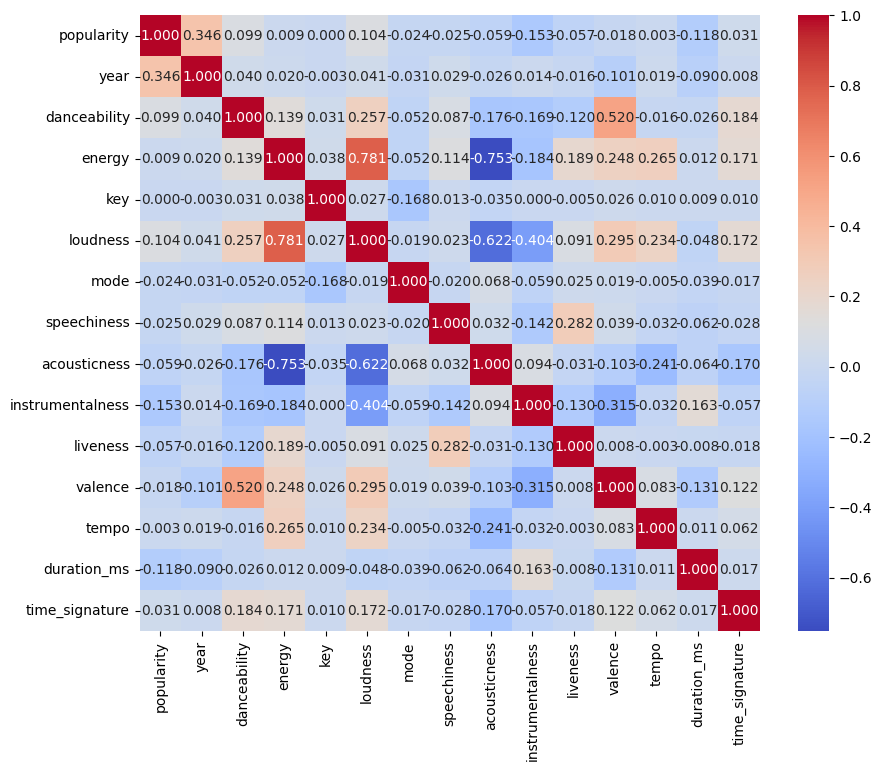

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), cmap = "coolwarm", fmt = ".3f", annot = True)
plt.savefig('correlation heatmap.jpg', format = 'jpg')

In [42]:
plt.savefig('correlation heatmap.jpg', format = 'jpg')

<Figure size 640x480 with 0 Axes>

In [251]:
#grouping by release year
yr = df.groupby('year')
index = yr['popularity'].idxmax()
track = df.iloc[index]
track

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
645985,Eminem,Marshall Mathers,3X4Oz9LjhhtgyOhVNlfoYa,58,2000,hip-hop,0.729,0.759,11,-3.177,0,0.1270,0.036100,0.000000,0.0694,0.268,95.935,321267,4
693918,System Of A Down,Bounce,6dr2T6DRymdT1jfSUxDgut,57,2001,metal,0.460,0.977,0,-3.853,0,0.0394,0.000245,0.201000,0.2830,0.890,92.666,114227,4
732754,Eminem,Hailie's Song,6Db8IlZ7YY1pfIjJllejyH,64,2002,hip-hop,0.787,0.731,7,-3.295,1,0.1560,0.016800,0.000087,0.0839,0.511,80.980,320640,4
779197,Linkin Park,Hit the Floor,5VYbLzAplnqPaGNpcf8qhZ,54,2003,metal,0.740,0.959,9,-3.692,1,0.1930,0.062900,0.000000,0.0444,0.878,150.007,164213,4
817992,Twista,Slow Jamz,3A4cpTBPaIQdtPFb5JxtaX,69,2004,hip-hop,0.559,0.733,2,-5.659,0,0.1710,0.314000,0.000000,0.2840,0.611,145.115,316053,4
845649,Mariah Carey,Shake It Off,4VKnkoNNM6yTb4cXXX3wqD,59,2005,dance,0.777,0.493,2,-6.516,1,0.1260,0.181000,0.000000,0.1080,0.820,134.086,232840,4
889692,Fergie,London Bridge,7jRoWfRlLnGYEIEn4t4kbq,63,2006,dance,0.770,0.609,1,-5.894,1,0.3450,0.214000,0.000000,0.1660,0.631,90.952,241307,4
946095,Arctic Monkeys,Plastic Tramp,5guOlrCnk9uYBmYs398dEB,34,2007,garage,0.361,0.870,7,-4.527,1,0.1360,0.001020,0.000896,0.4380,0.472,175.133,173520,4
1010887,Slightly Stoopid,No Cocaine,2vo0kfh9mZIUe2WsqYkFGb,49,2008,rock,0.696,0.740,6,-6.349,0,0.0524,0.256000,0.000942,0.2450,0.821,82.004,285293,4
1047486,Mike Jones,Next to You,7xVwhsuZTUWhIyFeDH6rYr,59,2009,hip-hop,0.650,0.753,2,-4.745,0,0.0632,0.324000,0.000000,0.3070,0.616,82.478,221933,4


In [149]:
#average popularity of artists
art_pop = df.groupby('artist_name')
avg_pop = art_pop['popularity'].mean()
#sort the results by average 
avg_pop = avg_pop.sort_values(ascending = False)
avg_pop

artist_name
NewJeans                 85.333333
Elley Duhé               85.000000
Rema                     80.666667
SunKissed Lola           80.000000
Fujii Kaze               80.000000
                           ...    
Third Sovereign           0.000000
Dark Franklin             0.000000
Dark Filth Fraternity     0.000000
Dark Blonde Elektric      0.000000
Overdream                 0.000000
Name: popularity, Length: 64158, dtype: float64

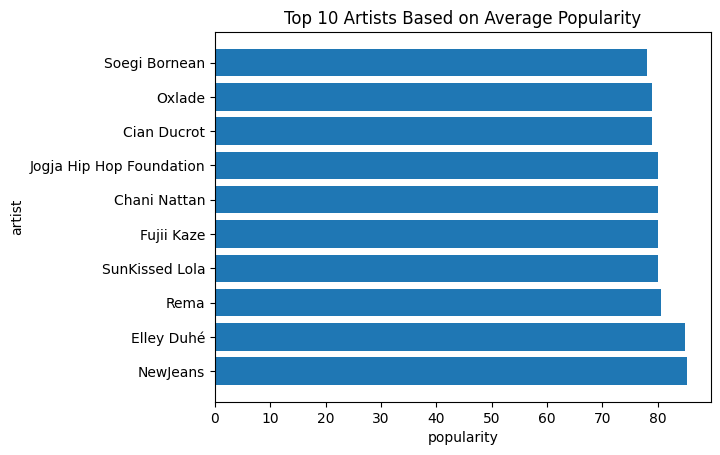

In [189]:
#plot the top ten artists
top_ten = avg_pop[:10]
df_avg = top_ten.to_frame()
plt.barh(df_avg.index, df_avg['popularity'])
plt.ylabel('artist')
plt.xlabel('popularity')
plt.title('Top 10 Artists Based on Average Popularity')
plt.savefig('top10.jpg', format = 'jpg', bbox_inches = 'tight')

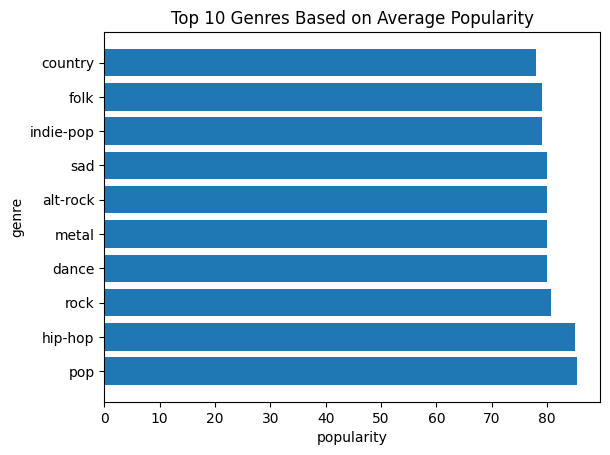

In [191]:
#plot the top ten genres
gen_pop = df.groupby('genre')
avg_gen = gen_pop['popularity'].mean()
avg_gen = avg_gen.sort_values(ascending=False)
top_gen = avg_gen[:10]
df_gen = top_gen.to_frame()
plt.barh(df_gen.index, df_avg['popularity'])
plt.ylabel('genre')
plt.xlabel('popularity')
plt.title('Top 10 Genres Based on Average Popularity')
plt.savefig('top10gen.jpg', format = 'jpg', bbox_inches = 'tight')

In [20]:
#sort by popularity
df_sort = df.sort_values(by='popularity', ascending=False)
df_sort

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
612503,Miley Cyrus,Flowers,0yLdNVWF3Srea0uzk55zFn,100,2023,pop,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,4
605178,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",4nrPB8O7Y7wsOCJdgXkthe,96,2023,hip-hop,0.778,0.632,2,-5.600,0,0.0493,0.2740,0.000000,0.0915,0.498,122.104,218289,4
612504,The Weeknd,Die For You - Remix,7oDd86yk8itslrA9HRP2ki,95,2023,pop,0.531,0.525,1,-6.500,0,0.0671,0.2320,0.000000,0.4410,0.502,66.900,232857,4
569184,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,94,2022,pop,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947,4
569195,Manuel Turizo,La Bachata,5ww2BF9slyYgNOk37BlC4u,93,2022,pop,0.835,0.679,7,-5.329,0,0.0364,0.5830,0.000002,0.2180,0.850,124.980,162638,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720590,Ronny Krappmann,Bleibt das Leben,2kt6Vr64UTjPfAz3QaiU3f,0,2002,disco,0.655,0.788,4,-5.759,0,0.0805,0.6090,0.000000,0.1460,0.874,120.103,231720,4
720589,Michael Larsen,Am Rande Einer Wüste,7gkliGuCEWkY4KP4ix3L8x,0,2002,disco,0.712,0.820,7,-5.018,1,0.0507,0.0182,0.000000,0.3270,0.833,135.012,196587,4
720588,Jeannine,Bleib bei mir,7iiHLswwP3bHejq8I3g5gD,0,2002,disco,0.584,0.642,8,-6.248,1,0.0260,0.0853,0.000000,0.2450,0.274,101.052,246040,4
720586,Andreas Zaron,"Schade, Schade, Vorbei",3ba5qIscHz4IIjp7x7os0W,0,2002,disco,0.791,0.575,10,-8.041,1,0.0313,0.2940,0.000000,0.2960,0.945,112.051,222813,4


In [53]:
#popularity 90 and above
top = df_sort[df_sort['popularity'] > 89]
top

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
612503,Miley Cyrus,Flowers,0yLdNVWF3Srea0uzk55zFn,100,2023,pop,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,0.0322,0.646,117.999,200455,4
605178,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",4nrPB8O7Y7wsOCJdgXkthe,96,2023,hip-hop,0.778,0.632,2,-5.600,0,0.0493,0.27400,0.000000,0.0915,0.498,122.104,218289,4
612504,The Weeknd,Die For You - Remix,7oDd86yk8itslrA9HRP2ki,95,2023,pop,0.531,0.525,1,-6.500,0,0.0671,0.23200,0.000000,0.4410,0.502,66.900,232857,4
569184,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,94,2022,pop,0.644,0.735,8,-5.747,1,0.0391,0.05210,0.144000,0.1610,0.418,88.980,153947,4
569195,Manuel Turizo,La Bachata,5ww2BF9slyYgNOk37BlC4u,93,2022,pop,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,162638,4
541577,David Guetta,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,93,2022,dance,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,4
569191,Rema,Calm Down (with Selena Gomez),0WtM2NBVQNNJLh6scP13H8,93,2022,pop,0.801,0.806,11,-5.206,1,0.0381,0.38200,0.000669,0.1140,0.802,106.999,239318,4
608232,NewJeans,OMG,65FftemJ1DbbZ45DUfHJXE,92,2023,k-pop,0.804,0.771,9,-4.067,0,0.0433,0.35700,0.000003,0.1080,0.739,126.956,212253,4
569187,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,92,2022,pop,0.637,0.643,4,-6.571,1,0.0519,0.13000,0.000002,0.1420,0.533,97.008,200690,4
560200,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",2tTmW7RDtMQtBk7m2rYeSw,92,2022,hip-hop,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,198938,4


In [201]:
top.shape

(28, 19)

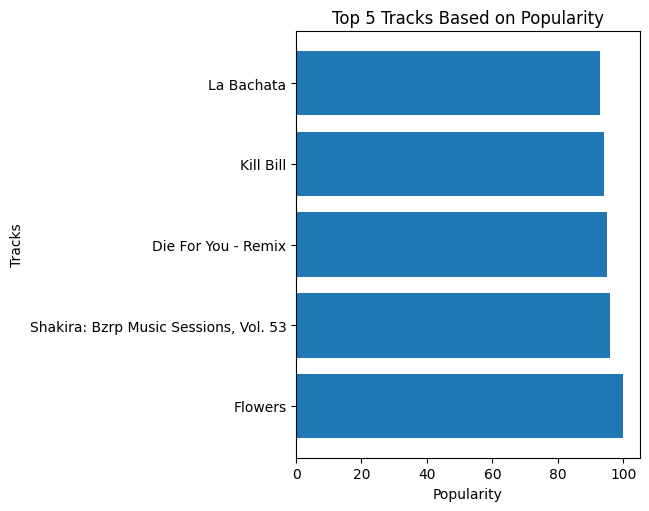

In [81]:
#top tracks based on popularity
top5 = top.head()
top5tracks = top5['track_name']
top5popularity = top5['popularity']
plt.barh(top5tracks, top5popularity)
plt.tight_layout()
plt.title("Top 5 Tracks Based on Popularity")
plt.ylabel("Tracks")
plt.xlabel("Popularity")
plt.savefig('top5tracks.jpg', format = 'jpg', bbox_inches = 'tight')

In [237]:
tab_gen = top['genre'].value_counts()

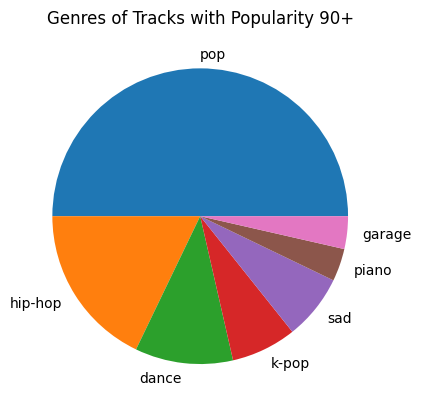

In [243]:
#pie chart of the genres of tracks with popularity 90+
gens = list(tab_gen.keys())
gen_count = tab_gen.tolist()
plt.pie(gen_count, labels = gens)
plt.title('Genres of Tracks with Popularity 90+')
plt.savefig('genpie.jpg', format = 'jpg')

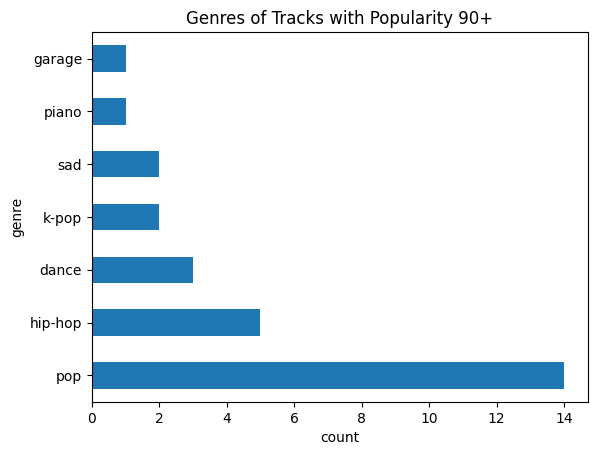

In [195]:
#bar chart of genres of tracks with popularity 90+
top_genre = top['genre'].value_counts().plot.barh(x="genre")
top_genre.set_ylabel("genre")
top_genre.set_xlabel("count")
top_genre.set_title("Genres of Tracks with Popularity 90+")
plt.savefig('genres.jpg', format = 'jpg')

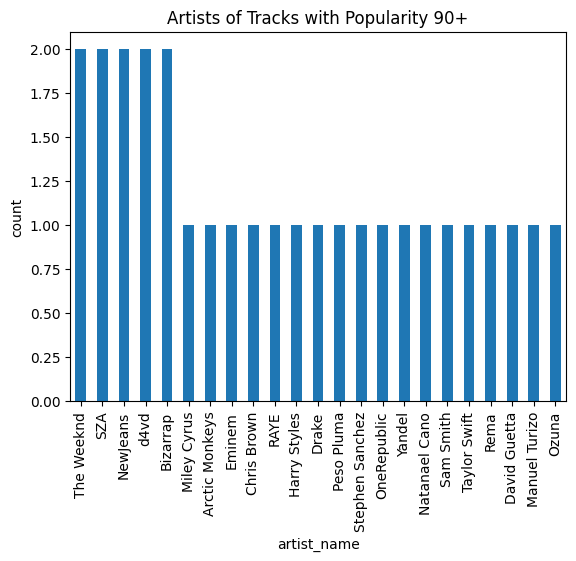

In [29]:
#bar chart of artists of tracks with popularity 90+
top_arts = top['artist_name'].value_counts().plot.bar(x="Artist")
top_arts.set_ylabel("count")
top_arts.set_title("Artists of Tracks with Popularity 90+")
plt.savefig('artists.jpg', format = 'jpg')

In [209]:
tab = top['year'].value_counts()

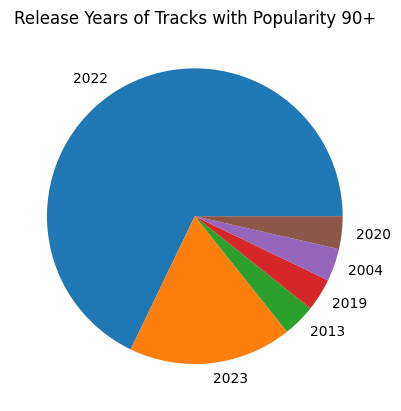

In [231]:
#pie chart of the release years of tracks with popularity 90+
yrs = list(tab.keys())
count = tab.tolist()
plt.pie(count, labels = yrs)
plt.title('Release Years of Tracks with Popularity 90+')
plt.savefig('yearpie.jpg', format = 'jpg')

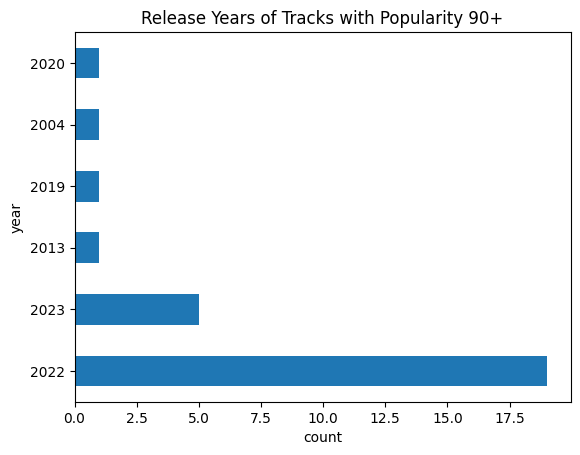

In [199]:
top_yr = top['year'].value_counts().plot.barh()
top_yr.set_ylabel('year')
top_yr.set_xlabel('count')
top_yr.set_title('Release Years of Tracks with Popularity 90+')
plt.savefig('year.jpg', format = 'jpg')

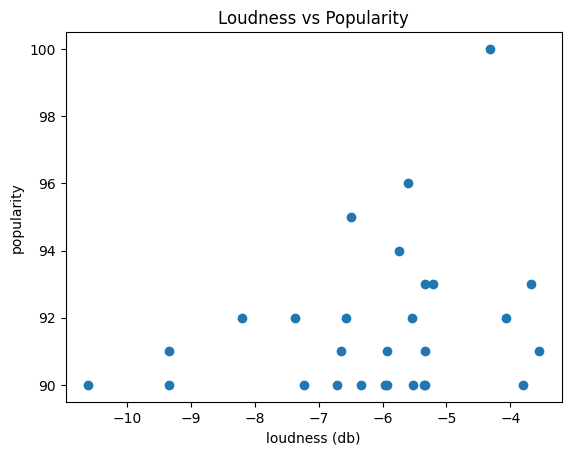

In [71]:
plt.scatter(top['loudness'], top['popularity'])
plt.xlabel("loudness (db)")
plt.ylabel("popularity")
plt.title("Loudness vs Popularity")
plt.savefig("loudness.jpg", format = "jpg")

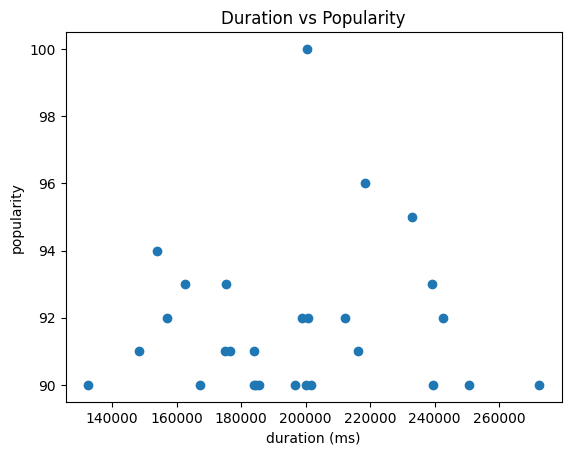

In [73]:
plt.scatter(top['duration_ms'], top['popularity'])
plt.xlabel("duration (ms)")
plt.ylabel("popularity")
plt.title("Duration vs Popularity")
plt.savefig("duration.jpg", format = "jpg")

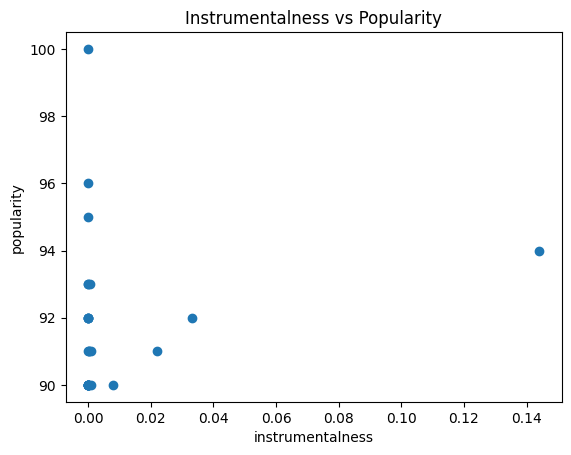

In [75]:
plt.scatter(top['instrumentalness'], top['popularity'])
plt.xlabel("instrumentalness")
plt.ylabel("popularity")
plt.title("Instrumentalness vs Popularity")
plt.savefig("instr.jpg", format = "jpg")

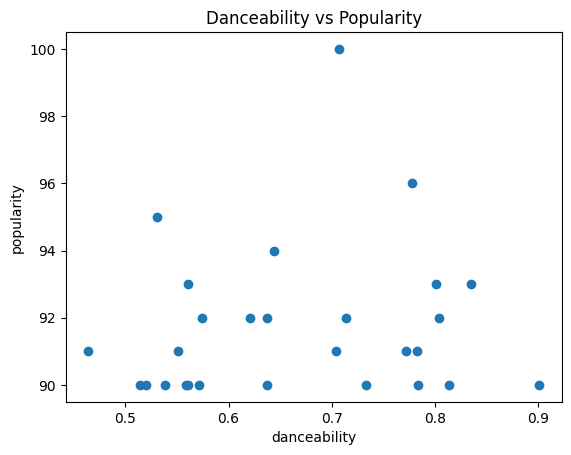

In [77]:
plt.scatter(top['danceability'], top['popularity'])
plt.xlabel("danceability")
plt.ylabel("popularity")
plt.title("Danceability vs Popularity")
plt.savefig("dance.jpg", format = "jpg")